<a href="https://colab.research.google.com/github/mungaimoureen/Week4-core-Autolib-cars-project/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_05_Moureen_Mungai_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> **AUTOLIB PROJECT DATA REPORT** 
The following report gives a summury of the analysis

https://docs.google.com/document/d/15JgSGV52HQk1K_ddKYMsEkbDqtpCVcRQ6qZ31oqugMU/edit?usp=sharing

In [1]:
#import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#read the data
df=pd.read_csv("autolib_daily_events_postal_code.csv")
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


DATA CLEANING


In conjuction with exploratory analysis.

In [4]:
df.shape

(16085, 13)

In [ ]:
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [5]:
df.duplicated().sum()

0

EXPLANATORY ANALYSIS OF THE DATA



UNIVARIATE ANALYSIS

In [6]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000
mean,125.926951,125.912714
std,185.426579,185.501535
min,0.000000,0.000000
25%,20.000000,20.000000
50%,46.000000,46.000000
75%,135.000000,135.000000
max,1352.000000,1332.000000


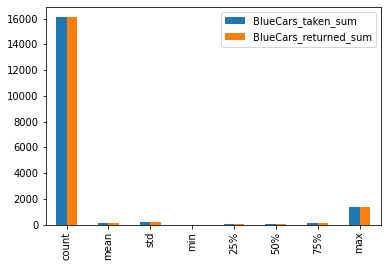

In [7]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].describe().plot.bar()

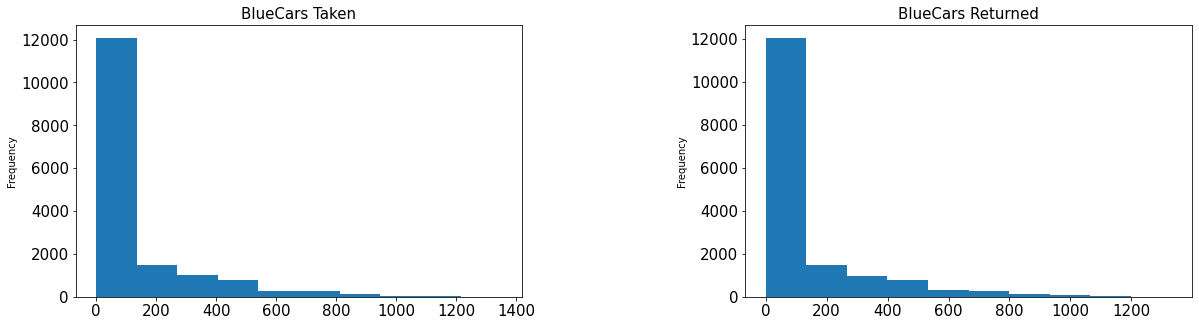

In [8]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['BlueCars_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)

In [9]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].kurt()

BlueCars_taken_sum       6.172692
BlueCars_returned_sum    6.186288
dtype: float64

In [10]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].describe().skew()

BlueCars_taken_sum       2.793824
BlueCars_returned_sum    2.794869
dtype: float64

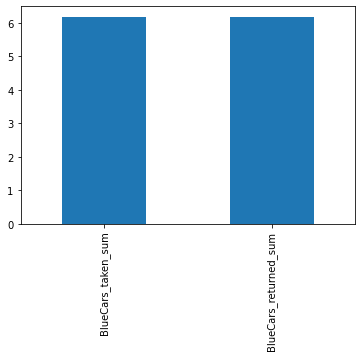

In [11]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].kurt().plot.bar()

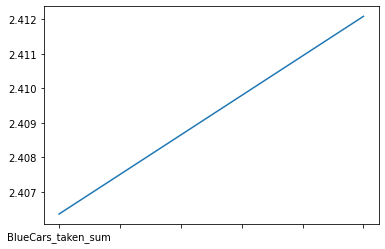

In [12]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].skew().plot.line()

CHECKING AND REMOVING OUTLIERS IN OUR DATASET

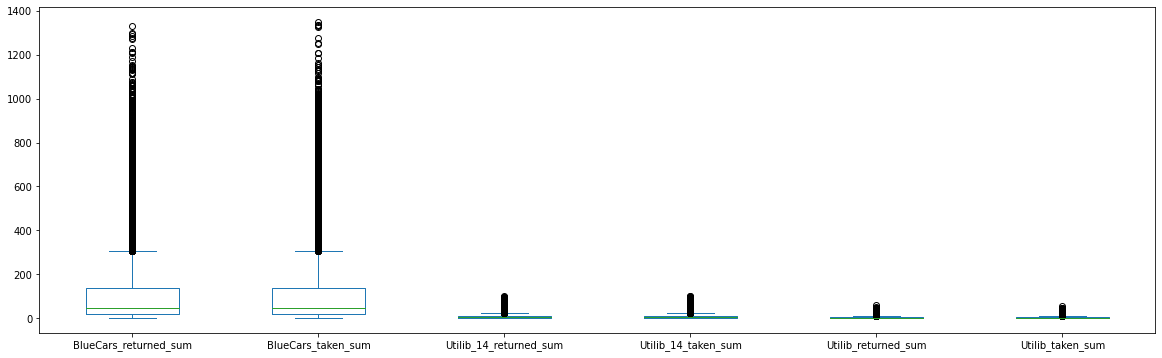

In [13]:
df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].plot(kind='box',figsize=(20,6))

In [ ]:
Q1 = df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].quantile(0.25)
Q3 = df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].quantile(0.75)
IQR = Q3 - Q1
IQR
((df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]<(Q1 - 1.5*IQR))|(df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]>(Q3 + 1.5 *IQR))).value_counts()
df = df[~((df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]<(Q1 - 1.5*IQR))|(df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]>(Q3 + 1.5 *IQR))).any(axis=1)]

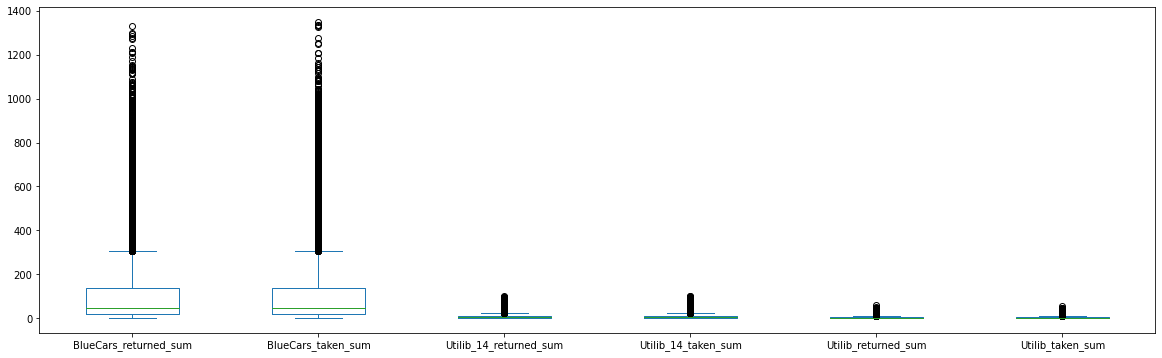

In [14]:
df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].plot(kind='box',figsize=(20,6))

Text(0.5, 1.0, 'Utilib_14 Returned')

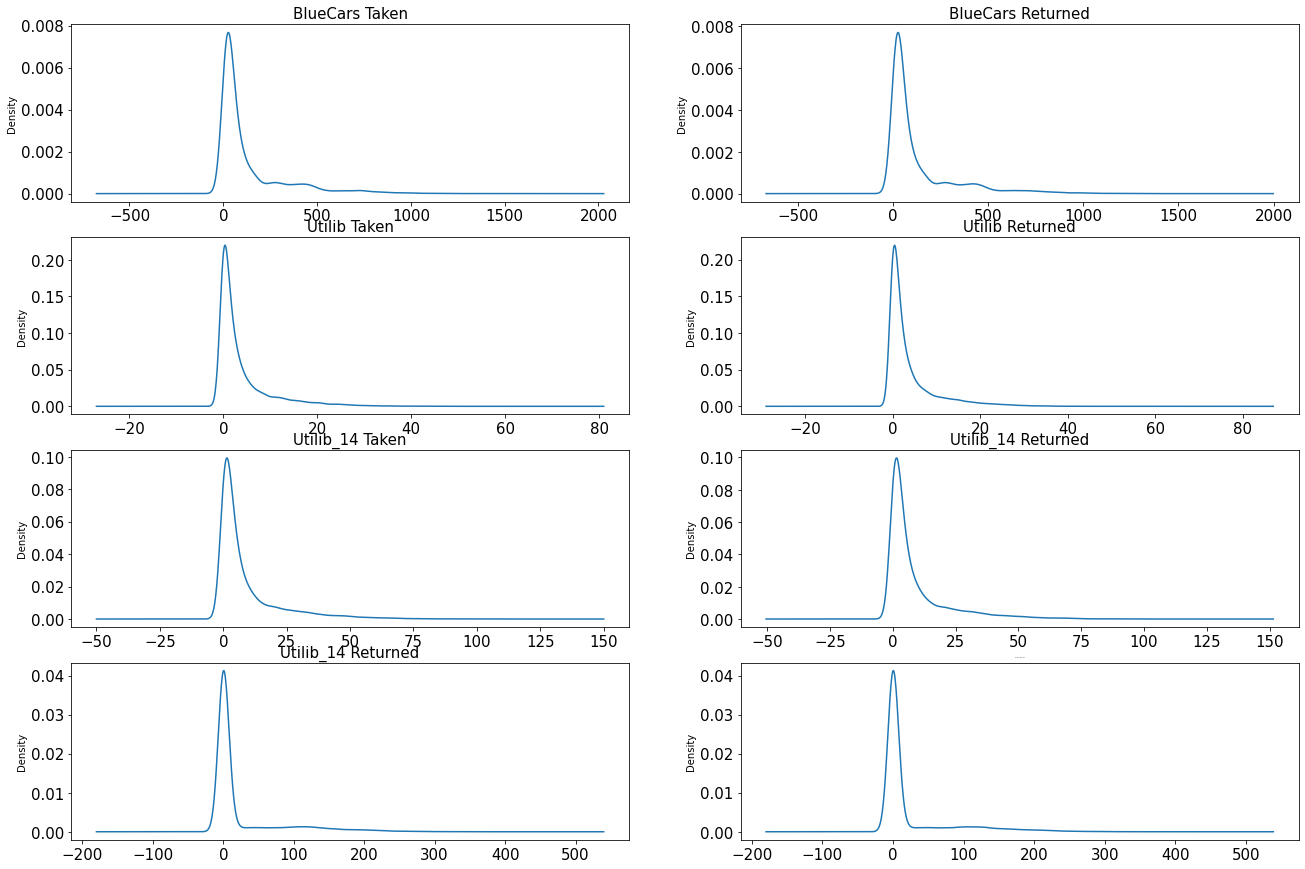

In [15]:

fig, axarr = plt.subplots(4, 2, figsize=(22, 15))
df['BlueCars_taken_sum'].plot(kind='density', ax=axarr[0][0], fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='density',ax=axarr[0][1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
df['Utilib_taken_sum'].plot( kind='density',ax=axarr[1][0], fontsize=15 ).set_title("Utilib Taken", fontsize=15) 
df['Utilib_returned_sum'].plot( kind='density',ax=axarr[1][1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
df['Utilib_14_taken_sum'].plot( kind='density',ax=axarr[2][0], fontsize=15 ).set_title("Utilib_14 Taken", fontsize=15) 
df['Utilib_14_returned_sum'].plot( kind='density',ax=axarr[2][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df['Slots_freed_sum'].plot( kind='density',ax=axarr[3][0], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df['Slots_taken_sum'].plot( kind='density',ax=axarr[3][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=1)

In [16]:
df.shape

(16085, 13)

BIVARIATE ANALYSIS


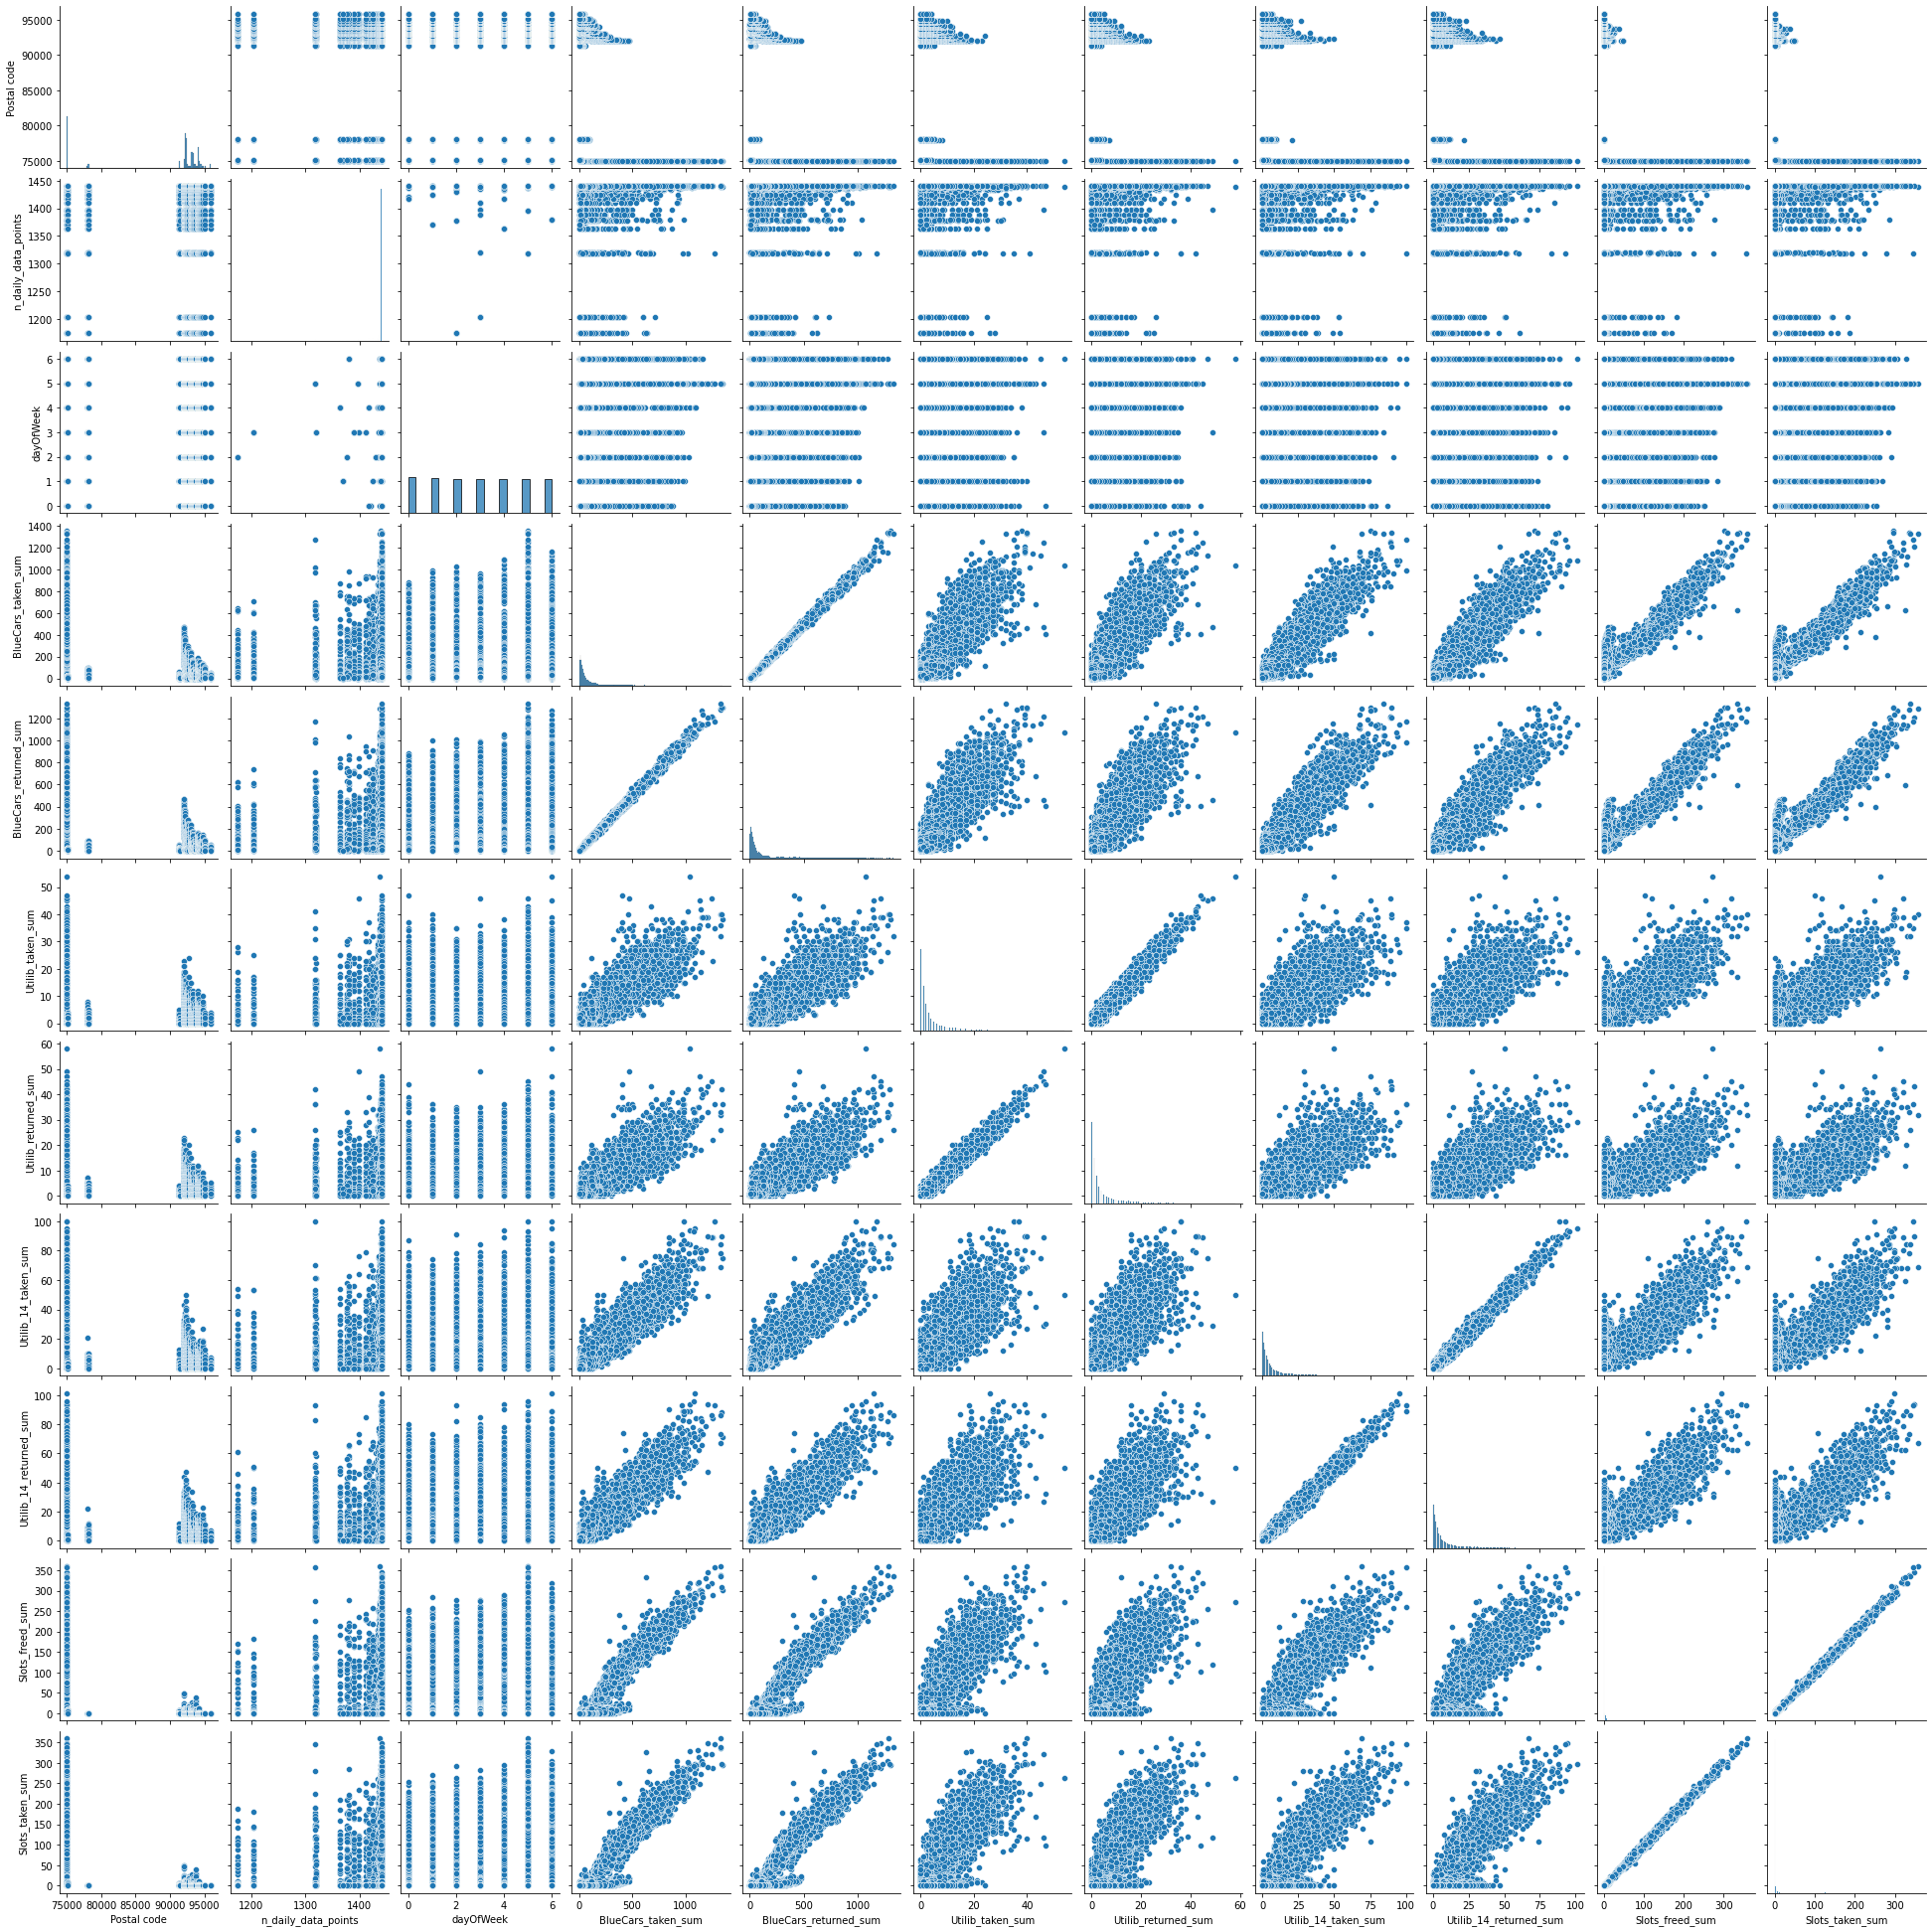

In [31]:
sns.pairplot(df)
plt.show()

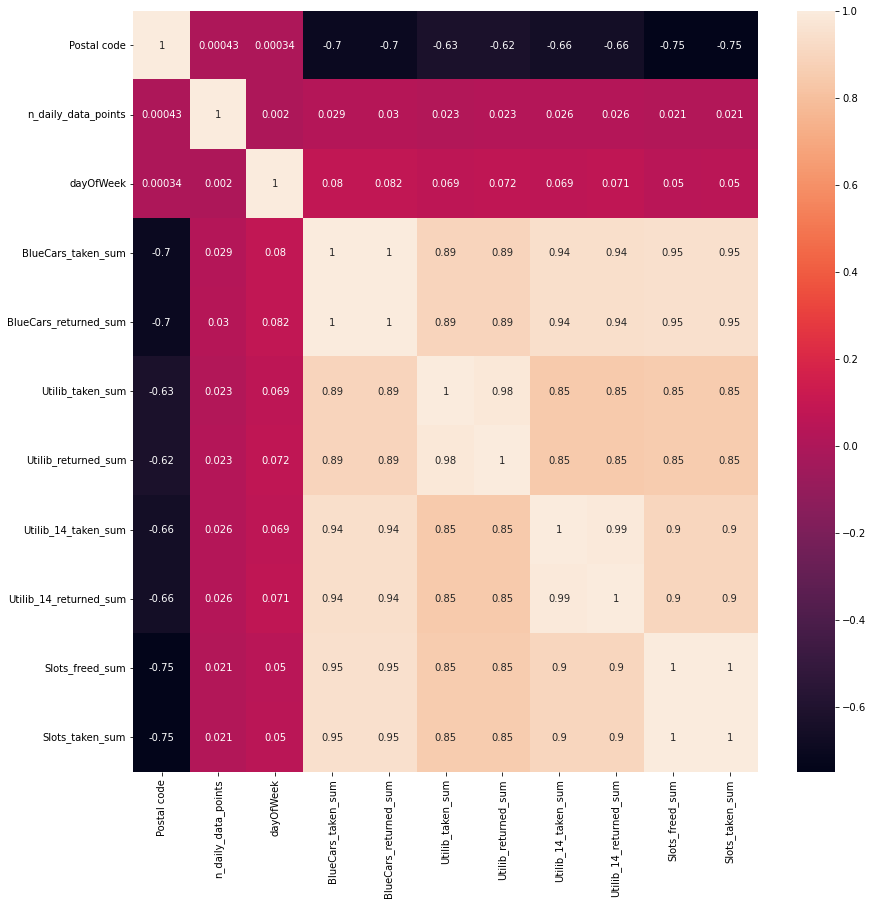

In [17]:
plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)
plt.show()


**HYPOTHESIS TESTING ON THE DATA**


Hypothesis testing is an act whereby an assumption is tested regarding a population parameter.

Suppose we wanted to determine whether the number of bluecars_taken_sum  are the same bluecars_returned.
A null hypothesis would be that the number of bluecars taken equals the number of bluecars returned. 

The alternaive hypothesis would be the number of bluecars taken is not equal to the number of bluecars returned.

The test can be conducted over a weekday. 

Null Hypothesis -> Ho: u1 = u2

Alternated Hypothesis -> Ha: u1 != u2

If we accept our null hypothesis then the number of bluecars_taken in the weekday equals the number of bluecars_returned in the weekday,

If we reject the null hypothesis the number of bluecars_taken is either less than or more than the number of cars returned on a particular day which should be a weekday.

In [18]:
from scipy import stats
shapiro_test = stats.shapiro(df.BlueCars_taken_sum)
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.661232590675354, 0.0)

In [19]:
stats.anderson(df.BlueCars_taken_sum, dist='norm')

AndersonResult(statistic=1973.8189161582413, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

After carrying out the Shapiro Wilk test for Normality we determined that

The P-value is < 0.05 we reject the null hypothesis and conclude that the the Data was not drawn from a Normal Distribution at alpha=0.05 level of significance.

In [20]:
#selecting the period of time we want to use to test the hypothesis 
df2=df[['BlueCars_taken_sum']][df['date']=='1/29/2018' ]

df3=df[['BlueCars_returned_sum']][df['date']=='1/29/2018']

**NORMALIZE THE DATA**

We carried out both the Shapiro Wilk and Anderson-Darling tests above and therefore we will try to normalize the data using the BoxCox transformation in order for us to carry out T-test

In [21]:

from scipy.special import boxcox1p
df2.BlueCars_taken_sum = boxcox1p(df2.BlueCars_taken_sum,0.25)

In [22]:
from scipy import stats
shapiro_test = stats.shapiro(df2.BlueCars_taken_sum)
shapiro_test

(0.9399300217628479, 0.00014015882334206253)

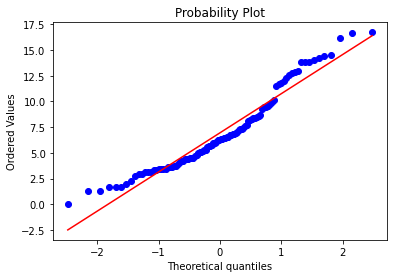

In [23]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(df2.BlueCars_taken_sum, plot = plt)
plt.show()

In [24]:

from scipy.special import boxcox1p
df3.BlueCars_returned_sum = boxcox1p(df3.BlueCars_returned_sum,0.25)

In [25]:
from scipy import stats
shapiro_test = stats.shapiro(df3.BlueCars_returned_sum)
shapiro_test

(0.9429386258125305, 0.0002169071522075683)

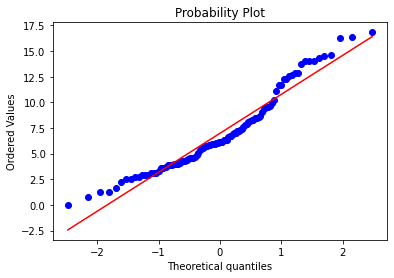

In [26]:

from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(df3.BlueCars_returned_sum, plot = plt)
plt.show()

TWO SAMPLE T-TEST

In [27]:
a= np.array(df2)
b = np.array(df3)

In [28]:
df2.describe()

,BlueCars_taken_sum
count,104.000000
mean,6.947103
std,3.871416
min,0.000000
25%,4.059619
50%,6.272518
75%,8.843666
max,16.734535


In [29]:
df3.describe()

,BlueCars_returned_sum
count,104.000000
mean,6.985961
std,3.853313
min,0.000000
25%,4.091630
50%,6.121758
75%,8.808638
max,16.834325


In [30]:
from scipy.stats import norm
import scipy.stats
TestStat = scipy.stats.ttest_ind(a, b, axis=0, equal_var=True)
TestStat

Ttest_indResult(statistic=array([-0.07254769]), pvalue=array([0.94223644]))

Carrying out the Test we establish that:

T-Statistic = -0.35 and the P-Value is 0.72

Therefore since the calculated statistic(-0.35 < 1.98) we Fail to reject the Null Hypothesis and conclude that there are an equal number of Blue cars being taken and returned to Stations on a given day at alpha = 0.05 level of significance.

**power of test**

In [ ]:
#!pip install statsmodels
from statsmodels.stats.power import tt_ind_solve_power
statsmodels.stats.power.tt_ind_solve_power(effect_size=0.75, nobs1=60, alpha=0.05, power=None, ratio=1, alternative='two-sided')

0.9827552322903581

**CONCLUSION**

After conducting hypothesis testing,we have determined that the mean number of BlueCars being taken and returned within the Station have approximately the same mean at alpha 0.05 level of significance.
The power of the test here was estimated to be 0.98 at alpha 0.05 level of significence. Therefore the probability of rejecting the null hypothesis when it is indeed false is given as 98%